In [1]:
# %matplotlib inline

import test
# import datetime as d
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.signal as sg
import pandas as pd
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import make_pipeline as mp
from sklearn import model_selection as ms
import numpy as np

pd.plotting.register_matplotlib_converters()

## Get Data


Starting dump run for date range 2020-01-01 00:00:00 - 2021-08-13 00:00:00 @interval=1hour


Data acquired. Total data points:14159

Creating Parameter system of order:3...

Parameters are ready...

- Creating addtional features...

Data modelling complete...

- Performing Fourier Transform for v..

- Performing Fourier Transform for c..



C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1['dv1t_o'],xdate=False,linestyle='-',label='dv1t_o',marker='')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1.x1_pr,xdate=False,linestyle='dotted',marker='',linewidth=0.8,label='x1_pr')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marke

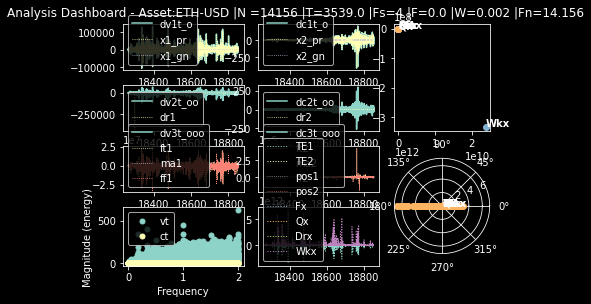

- Dump Complete...


In [2]:
Fs = 4
data_o = test.testbed(start=dt(2020,1,1),stop=dt(2021,8,13),Fs=Fs,interval='1hour')

### Variables

In [3]:
columns = ['dv1t_o','dv2t_oo','dv3t_ooo','vf_t','v_fft','dr1','ma1','ft1','wrk1','TE1','KE1','PE1','w1','w1_n','rf1','q1','x1_gn','x1_pr','wrk1','idpos1','idpos2'
            ,'Ftm','Fta','Ftt','Ffm','Ffa','Fft','Mam','Maa','Mat','Qfm','Qfa','Qft','Pxm','Pxa','Pxt','Wkm','Wka','Wkt','Drm','Dra','Drt','wrk2'
            ,'x2_pr','x2_gn','q2','rf2','w2_n','w2','PE2','KE2','TE2','wrk2','ft2','ma2','dr2','c_fft','cf_t','dc3t_ooo','dc2t_oo','dc1t_o']

In [4]:
data_o.columns.values

array(['l', 'h', 'o', 'c', 'v', 'idposc', 'c1t_1', 'dc1t_o', 'c2t_1',
       'dc2t_o', 'c2to_1', 'dc2t_oo', 'c3t_1', 'dc3t_o', 'c3to_1',
       'dc3t_oo', 'c3too_1', 'dc3t_ooo', 'v1t_1', 'dv1t_o', 'v2t_1',
       'dv2t_o', 'v2to_1', 'dv2t_oo', 'v3t_1', 'dv3t_o', 'v3to_1',
       'dv3t_oo', 'v3too_1', 'dv3t_ooo', 'idpos1', 'idpos2', 'al1', 'al2',
       'x1_gn', 'x2_gn', 'x1_pr', 'x2_pr', 'al1n', 'al2n', 'ft1', 'ft2',
       'ff1', 'ff2', 'k1', 'k2', 'ac1', 'ac2', 'ma1', 'ma2', 'w1_n',
       'w2_n', 'dr1', 'dr2', 'w1', 'w2', 'rf1', 'rf2', 'fr1', 'fr2',
       'lmda1', 'lmda2', 'q1', 'q2', 'PE1', 'KE1', 'TE1', 'PE2', 'KE2',
       'TE2', 'wrk1', 'wrk2', 'Pxm', 'Pxa', 'Pxt', 'Ftm', 'Fta', 'Ftt',
       'Mam', 'Maa', 'Mat', 'Ffm', 'Ffa', 'Fft', 'Qfm', 'Qfa', 'Qft',
       'Drm', 'Dra', 'Drt', 'Wkm', 'Wka', 'Wkt', 'v_fft', 'fft_freq',
       'vf_t', 'c_fft', 'cf_t'], dtype=object)

In [5]:
data_o[['w1_n','w1','lmda1','dr1','al1','k1','k2','al2','dr2','lmda2','w2','w2_n']].describe()

,w1_n,w1,lmda1,dr1,al1,k1,k2,al2,dr2,lmda2,w2,w2_n
count,1.415600e+04,14156.000000,1.415600e+04,14156.000000,14156.000000,14156.00000,14156.000000,14156.000000,14156.000000,14156.000000,14156.000000,1.415600e+04
mean,1.256637e+01,14.728575,-3.866488e+02,-30.768535,-4.896965,157.91367,12.557977,0.999744,1.771408,6.277380,0.002831,3.543724e+00
std,3.552839e-15,82.052958,4.482886e+04,3567.367590,567.764186,0.00000,0.000000,0.049816,0.088267,0.312795,0.097800,8.882098e-16
min,1.256637e+01,0.000000,-5.315457e+06,-422990.639279,-67321.051123,157.91367,12.557977,-1.045065,-1.851711,-6.561953,0.000000,3.543724e+00
25%,1.256637e+01,0.000000,1.217224e+01,0.968636,0.154163,157.91367,12.557977,0.998665,1.769496,6.270605,0.000000,3.543724e+00
50%,1.256637e+01,0.000000,8.436884e+01,6.713859,1.068544,157.91367,12.557977,0.999959,1.771789,6.278731,0.000000,3.543724e+00
75%,1.256637e+01,2.126270,1.450825e+02,11.545299,1.837491,157.91367,12.557977,1.001045,1.773714,6.285551,0.000000,3.543724e+00
max,1.256637e+01,8172.891919,1.486034e+05,11825.480098,1882.083612,157.91367,12.557977,2.436739,4.317564,15.300254,5.984290,3.543724e+00


In [6]:
sig = data_o[columns]

In [7]:
# Normalize training data
sign = sig.copy()

sign.reset_index(drop=True,inplace=True)

for col in sign:
        if col not in ['vf_t','cf_t','idpos1','idpos2']:
            sign[col] = (sign[col]-sign[col].mean())/sign[col].std()
            sign[col] = sign[col].replace([np.inf, -np.inf], np.nan)
            sign[col] = sign[col].fillna(np.abs(sign[col]).max())

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [8]:
sign.drop(['vf_t','cf_t','idpos1','idpos2'],axis=1).describe()

,dv1t_o,dv2t_oo,dv3t_ooo,v_fft,dr1,ma1,ft1,wrk1,TE1,KE1,...,KE2,TE2,wrk2,ft2,ma2,dr2,c_fft,dc3t_ooo,dc2t_oo,dc1t_o
count,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04+0.000000e+00j,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04,14156.000000,1.415600e+04,...,1.415600e+04,1.415600e+04,14156.000000,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04+0.000000e+00j,1.415600e+04,1.415600e+04,1.415600e+04
mean,8.611365e-18,-1.129359e-18,4.721350e-18,-2.610075e-17+2.007750e-17j,-1.003875e-18,3.011625e-18,-1.606200e-17,-5.019375e-18,0.000000,-8.031000e-18,...,-8.031000e-18,4.015500e-18,0.000000,1.254844e-19,-1.607769e-17,7.699721e-16,6.424800e-17+0.000000e+00j,-8.595680e-18,6.321275e-18,2.007750e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00+0.000000e+00j,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00+0.000000e+00j,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.123440e+01,-1.555042e+01,-1.375563e+01,-3.154058e+01+4.173073e-01j,-1.185636e+02,-5.948122e+01,-1.301873e+01,-2.956673e+01,-30.191779,-1.619425e-01,...,-1.619425e-01,-3.428221e+01,-41.200334,-4.282446e+01,-1.525875e+00,-4.104706e+01,-4.092097e+01-7.576732e+00j,-1.549989e+01,-1.979368e+01,-2.191482e+01
25%,-2.494978e-01,-2.031923e-01,-2.471518e-01,-2.899488e+00-2.560774e-01j,8.896524e-03,8.249765e-03,-1.707072e-01,6.038864e-02,0.120028,-1.603292e-01,...,-1.603292e-01,1.132943e-01,0.004182,-6.159076e-03,-9.711053e-01,-2.165949e-02,-7.722785e+00-8.437948e+00j,-1.316918e-01,-1.332122e-01,-1.143797e-01
50%,-1.689814e-02,4.206038e-02,4.403178e-03,-1.381498e-02-7.357957e-01j,1.050702e-02,8.350063e-03,1.304474e-01,7.746306e-02,0.163466,-1.519718e-01,...,-1.519718e-01,1.543735e-01,0.004942,5.296936e-03,3.280857e-02,4.318324e-03,-4.172146e-02+2.220446e-15j,-3.681509e-04,-2.021098e-03,-5.096318e-03
75%,2.131714e-01,2.886872e-01,2.587391e-01,2.860140e+00+9.667948e-01j,1.186136e-02,8.499219e-03,3.203860e-01,8.256215e-02,0.171493,-1.098021e-01,...,-1.098021e-01,1.614266e-01,0.005798,1.662591e-02,1.008257e+00,2.612157e-02,7.614958e+00-1.613618e+01j,1.305103e-01,1.212076e-01,1.195716e-01
max,1.433471e+01,8.942568e+00,1.346314e+01,5.955696e+01-7.409900e-16j,3.323529e+00,5.949789e+01,9.478898e+00,1.366982e+01,0.185509,3.900117e+01,...,3.900117e+01,6.014995e-01,104.400316,9.349543e+01,1.466577e+00,2.884592e+01,4.330925e+01+2.457202e+00j,2.241769e+01,2.253631e+01,1.085109e+01


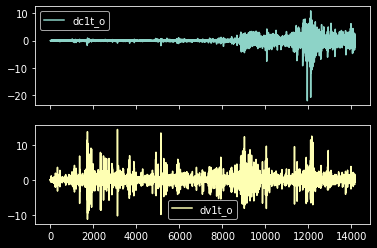

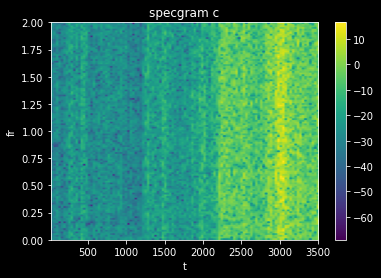

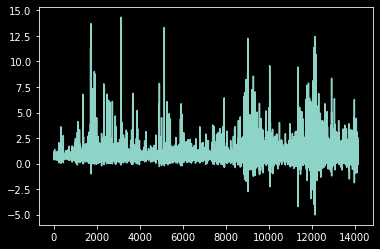

In [9]:
sign[['dc1t_o','dv1t_o']].plot(subplots=True)
plt.show()

Spc, fr, t,im  = plt.specgram(sign.dc1t_o,Fs=Fs)
plt.title('specgram c')
plt.xlabel('t')
plt.ylabel('fr')
plt.colorbar()
plt.show()

np.logaddexp(sign.dv1t_o,sign.dc1t_o).plot()
plt.show()

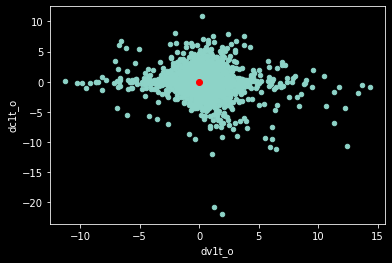

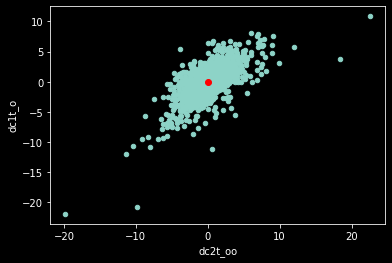

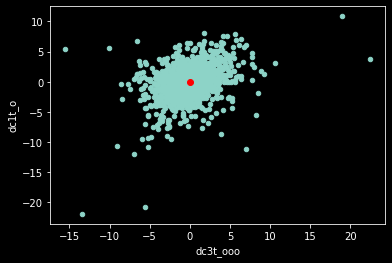

Text(0.5, 0, 'dc1t_o-1')

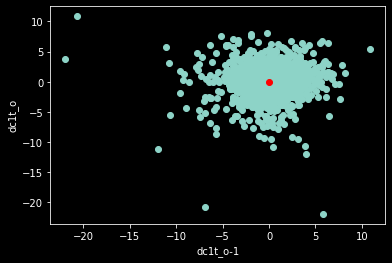

In [10]:
sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()
sign.plot.scatter('dc2t_oo','dc1t_o')
plt.plot(sign.dv2t_oo.mean(),sign.dc2t_oo.mean(),color='r',marker='o')
plt.show()
sign.plot.scatter('dc3t_ooo','dc1t_o')
plt.plot(sign.dv3t_ooo.mean(),sign.dc3t_ooo.mean(),color='r',marker='o')
plt.show()
plt.scatter(sign['dc1t_o'].shift(1),sign['dc1t_o'])
plt.plot(sign.dc1t_o.mean(),sign.dc1t_o.shift(1).mean(),color='r',marker='o')
plt.ylabel('dc1t_o')
plt.xlabel('dc1t_o-1')

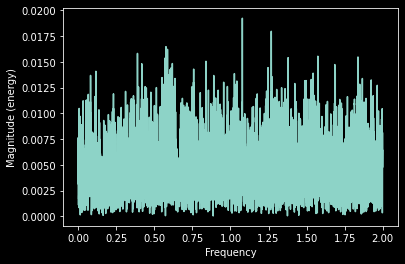

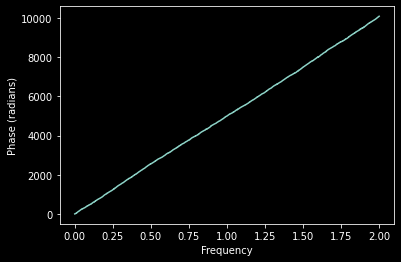

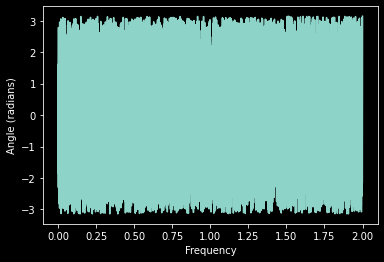

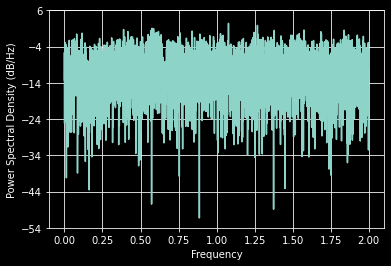

max psd dB/Hz: 1.7456451208076555 @ 1.077988132240746 Hz / 6.77319919380902 Rad/s
min psd dB/Hz: 7.433124860374675e-06 @ 0.8866911556936988 Hz / 5.571244841460736 Rad/s


In [11]:
s,fm,l = plt.magnitude_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

p,fp,l = plt.phase_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

a,fa,l = plt.angle_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

pwr,fr = plt.psd(sign.dc1t_o,noverlap=len(sign)//2,NFFT=len(sign),Fs=Fs)
plt.show()
print('max psd dB/Hz:',pwr.max(),'@',fr[pwr==pwr.max()][0],'Hz','/',2*np.pi*fr[pwr==pwr.max()][0],'Rad/s')
print('min psd dB/Hz:',pwr.min(),'@',fr[pwr==pwr.min()][0],'Hz','/',2*np.pi*fr[pwr==pwr.min()][0],'Rad/s')

### Magnitude Squared Coherence

Max Coherence: 0.2694131286116415 @ 0.078125 Hz
Min Coherence: 0.00030916330506045963 @ 0.59375 Hz
Mean Coherence 0.042522060376778394 @ 0.40625 Hz


count    129.000000
mean       0.042522
std        0.047392
min        0.000309
25%        0.010029
50%        0.027272
75%        0.058148
max        0.269413
dtype: float64

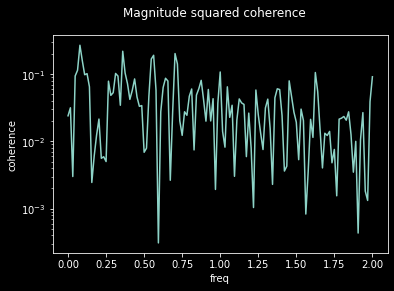

In [12]:
# Magnitude squared coherence Cxy = abs(Pxy)**2/(Pxx*Pyy)
# where Pxx and Pyy are power spectral densities and Pxy is the
# cross spectral density.
fc,Cxy = sg.coherence(sign.dc1t_o,sign.dv1t_o,fs=Fs)

plt.semilogy(fc,Cxy)
plt.suptitle('Magnitude squared coherence')
plt.xlabel('freq')
plt.ylabel('coherence')

print('Max Coherence:',Cxy.max(),'@',fc[Cxy==Cxy.max()][0],'Hz')
print('Min Coherence:',Cxy.min(),'@',fc[Cxy==Cxy.min()][0],'Hz')
print('Mean Coherence',Cxy.mean(),'@',fc[Cxy.round(2)==np.round(Cxy.mean(),2)][0],'Hz')
pd.Series(Cxy).describe()

### Covariance with Idposc

In [13]:
# COVARIANCE LEADER BOARD
cov=sign.cov()[['idpos1','idpos2']].sort_values(by='idpos1',ascending=False)
cov_ld = cov.abs() > cov.quantile(0.75)
cov_ldbrd = cov[cov_ld].dropna()
cov_ldbrd

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\internals\managers.py:1517: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


,idpos1,idpos2
vf_t,86.421383,-3.593983
cf_t,3.942889,1.406843
dc1t_o,0.209171,0.074633
x2_pr,0.209118,0.074665
idpos1,0.160003,0.069517
dc2t_oo,0.148640,0.053204
Pxa,0.125208,0.056666
c_fft,0.099313,0.053235
Wka,0.090366,0.058569
dc3t_ooo,0.079402,0.029884


In [14]:
# Correlation with idposc Leaderboard
corr = sign.corrwith(sign.idpos1).sort_values(ascending=False)
corr_ldbrd = corr[corr.abs()>=corr.quantile(0.75)]
corr_ldbrd

idpos1      1.000000+0.000000j
idpos2      0.616978+0.000000j
dc1t_o      0.522923+0.000000j
cf_t        0.522923+0.000000j
x2_pr       0.522790+0.000000j
dc2t_oo     0.371598+0.000000j
Pxa         0.313018+0.000000j
Wka         0.225914+0.000000j
dc3t_ooo    0.198504+0.000000j
Fta         0.176017+0.000000j
Ffa         0.173192+0.000000j
Pxm         0.111534+0.000000j
Ftm         0.093537+0.000000j
Ffm         0.093537+0.000000j
PE2         0.037126+0.000000j
KE1         0.035429+0.000000j
KE2         0.035429+0.000000j
TE2        -0.036599+0.000000j
x1_gn      -0.158063+0.000000j
dtype: complex128

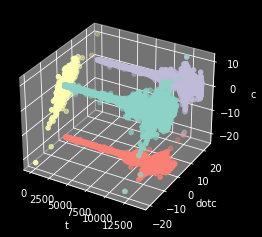

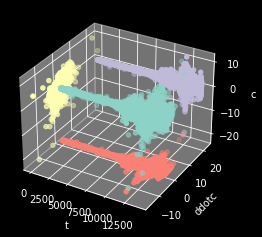

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.dc2t_oo,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.dc2t_oo,sign.dc1t_o)
ax.scatter(sign.index,sign.dc2t_oo.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dc2t_oo,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('dotc')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.dc3t_ooo,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.dc3t_ooo,sign.dc1t_o)
ax.scatter(sign.index,sign.dc3t_ooo.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dc3t_ooo,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ddotc')
ax.zaxis.label.set_text('c')


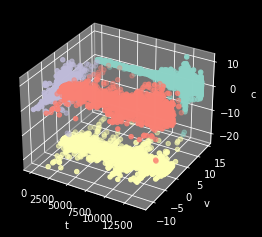

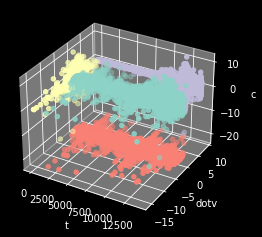

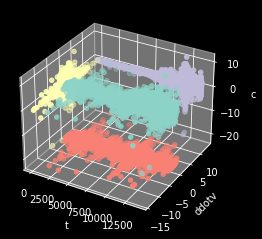

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.dv1t_o.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dv1t_o,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.dv1t_o,sign.dc1t_o)
ax.scatter(sign.index,sign.dv1t_o,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('v')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.dv2t_oo,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.dv2t_oo,sign.dc1t_o)
ax.scatter(sign.index,sign.dv2t_oo.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dv2t_oo,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('dotv')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.dv3t_ooo,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.dv3t_ooo,sign.dc1t_o)
ax.scatter(sign.index,sign.dv3t_ooo.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dv3t_ooo,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ddotv')
ax.zaxis.label.set_text('c')

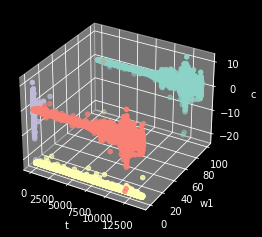

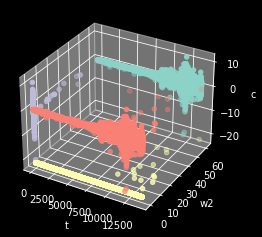

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.w1.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.w1,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.w1,sign.dc1t_o)
ax.scatter(sign.index,sign.w1,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('w1')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.w2.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.w2,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.w2,sign.dc1t_o)
ax.scatter(sign.index,sign.w2,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('w2')
ax.zaxis.label.set_text('c')

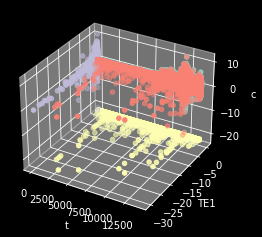

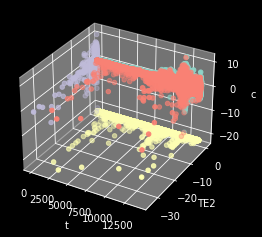

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.TE1.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.TE1,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.TE1,sign.dc1t_o)
ax.scatter(sign.index,sign.TE1,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('TE1')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.TE2.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.TE2,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.TE2,sign.dc1t_o)
ax.scatter(sign.index,sign.TE2,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('TE2')
ax.zaxis.label.set_text('c')

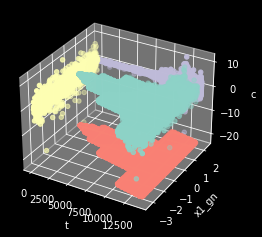

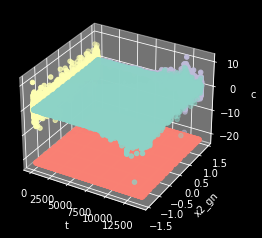

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.x1_gn,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.x1_gn,sign.dc1t_o)
ax.scatter(sign.index,sign.x1_gn.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.x1_gn,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('x1_gn')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.x2_gn,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.x2_gn,sign.dc1t_o)
ax.scatter(sign.index,sign.x2_gn.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.x2_gn,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('x2_gn')
ax.zaxis.label.set_text('c')

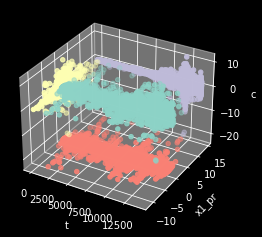

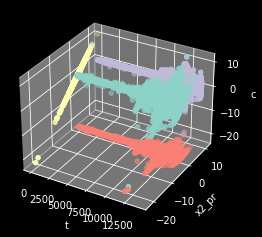

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.x1_pr,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.x1_pr,sign.dc1t_o)
ax.scatter(sign.index,sign.x1_pr.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.x1_pr,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('x1_pr')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.x2_pr,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.x2_pr,sign.dc1t_o)
ax.scatter(sign.index,sign.x2_pr.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.x2_pr,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('x2_pr')
ax.zaxis.label.set_text('c')

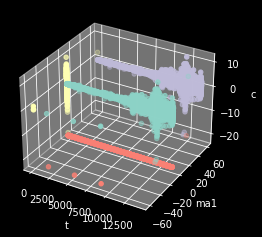

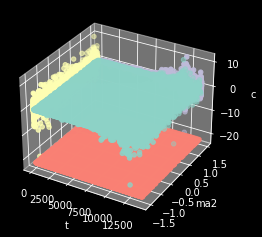

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.ma1,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.ma1,sign.dc1t_o)
ax.scatter(sign.index,sign.ma1.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.ma1,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ma1')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.ma2,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.ma2,sign.dc1t_o)
ax.scatter(sign.index,sign.ma2.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.ma2,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ma2')
ax.zaxis.label.set_text('c')

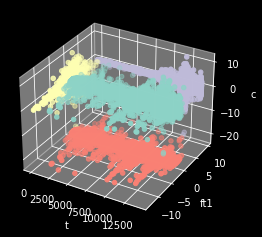

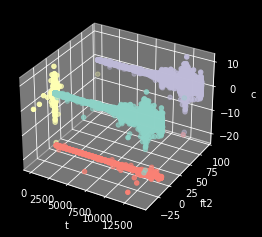

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.ft1,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.ft1,sign.dc1t_o)
ax.scatter(sign.index,sign.ft1.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.ft1,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ft1')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index,sign.ft2,sign.dc1t_o)
ax.scatter(np.zeros(len(sign)),sign.ft2,sign.dc1t_o)
ax.scatter(sign.index,sign.ft2.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.ft2,sign.dc1t_o.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ft2')
ax.zaxis.label.set_text('c')

In [23]:
t,f,Sxx = sg.spectrogram(sign.dc1t_o,fs=Fs)

In [24]:
q1 = sign[col].quantile(0.05)
q3 = sign[col].quantile(0.95)
iqr = q3-q1

c_no = sign.dc1t_o[~((sign.dc1t_o< (q1-1.5*iqr)) |  (sign.dc1t_o > (q3+1.5*iqr)))]
c_no.describe()

count    14071.000000
mean         0.009881
std          0.811054
min         -4.815156
25%         -0.112788
50%         -0.005096
75%          0.118511
max          5.084538
Name: dc1t_o, dtype: float64

<AxesSubplot:>

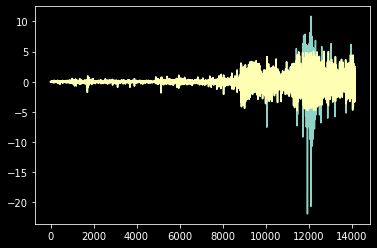

In [25]:
sign.dc1t_o.plot()
c_no.plot()

In [26]:
sign.kurtosis().sort_values(ascending=False)

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\nanops.py:1249: ComplexWarning: Casting complex values to real discards the imaginary part
  values = values.astype("f8")


Drm      13965.015265
Drt      13963.428914
dr1      13963.428789
wrk2      8648.943772
wrk2      8648.943772
             ...     
Fta         -1.320960
ma2         -1.466034
Mat         -1.466039
x2_gn       -1.500106
Maa         -1.998423
Length: 61, dtype: float64

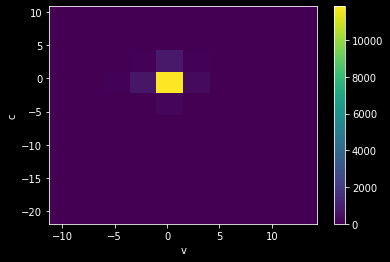

In [27]:
Hxy,x,y = np.histogram2d(sign.dv1t_o,sign.dc1t_o)

X,Y = np.meshgrid(x,y)

plt.pcolormesh(X,Y,Hxy.T)
plt.xlabel('v')
plt.ylabel('c')
plt.colorbar()

In [28]:
sign[np.abs(sign.w1/sign.w1_n)>0.9999]

,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
67,-0.029801,-0.038905,-0.287312,-279.981-0.000j,0.296919+0.016065j,-0.009137,0.008227,0.177474,0.077567,0.172811,...,0.162154,0.004933,0.004360,-1.263043,0.013028,10.671097-2.647104j,0.02+0.00j,-0.009494,0.004804,-0.009871
69,-0.644802,-0.832284,-0.725749,-6066.389-0.000j,1.218534+0.569427j,-0.016469,0.008219,-0.221012,0.105045,0.146855,...,0.097232,-0.003026,-0.033706,-0.596386,0.008980,-17.713515+5.200099j,0.79-0.00j,0.069523,0.073812,0.030978
100,-0.100203,-0.119922,-0.098918,-942.375-0.000j,0.683477-0.278908j,-0.010098,0.008218,0.242709,0.077114,0.172422,...,0.160702,0.004555,-0.006981,0.873546,0.012597,-16.120631+1.218947j,0.33+0.00j,0.039919,0.025658,0.006575
208,-0.772741,-0.952630,-0.767707,-7270.141+0.000j,-0.747630-0.569679j,-0.065053,0.008226,0.601348,0.047051,0.138840,...,0.068064,0.007626,0.015987,1.383457,0.011051,17.623250-7.080931j,-0.08+0.00j,0.101352,0.077983,-0.015176
215,-0.493999,-0.628055,-0.562075,-4647.515-0.000j,0.946163+0.607226j,-0.036337,0.008221,-0.123226,0.093670,0.157597,...,0.124020,0.013342,0.058482,1.284299,0.004537,9.039639-9.899479j,-0.61-0.00j,-0.005710,-0.028563,-0.043292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,-0.832974,-1.006391,-0.820829,-7836.861-0.000j,1.431250+1.340301j,-0.016078,0.007846,0.592309,0.048070,0.139640,...,0.050975,-0.387015,-1.462911,-1.190588,0.134136,-6.458656-1.638081j,30.34+0.00j,3.351500,3.059737,1.598611
13991,-0.538324,-0.655203,-0.846464,-5064.565+0.000j,2.706534-0.597364j,-0.024605,0.008681,0.461620,0.064353,0.158053,...,0.115792,0.135979,0.764014,-0.415617,0.146437,-5.428355-3.725631j,-11.90-0.00j,1.997309,0.900392,-0.642229
14017,-0.776911,-0.991302,-0.877762,-7309.376-0.000j,-1.746507-1.472334j,-0.029315,0.008439,-0.306334,0.117458,0.135099,...,0.068286,-0.183824,-0.760051,-0.931989,-0.054315,4.851695+13.412602j,10.45+0.00j,-0.538572,-0.424790,0.543443
14037,-0.366043,-0.476104,-0.293524,-3443.607+0.000j,-1.025228+1.341132j,-0.011448,0.008682,-0.036474,0.086228,0.164508,...,0.141366,0.243060,2.047666,-0.820321,0.003452,1.756270-8.768805j,-52.50-0.00j,0.430997,-2.001738,-2.796066


In [29]:
poles_Pxt = sign[sign.Pxt.abs() <0.001]
poles_Pxt.describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,40.000000,40.000000,40.000000,40.00000+0.00000j,40.000000+0.000000j,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000+0.000000j,40.00000+0.00000j,40.000000,40.000000,40.000000
mean,0.000085,0.050194,0.024598,1.213125-0.000000j,0.476882+0.349962j,0.010653,0.008364,0.055867,0.065994,0.161019,...,0.162484,0.004939,0.002151,0.094512,0.931469,-0.083037-1.186161j,-0.602750-0.000000j,-0.007819,-0.032260,-0.042908
std,0.000771,0.140975,0.196633,7.252201+0.000000j,N00000000a00000000N,0.001740,0.000160,0.220887,0.029410,0.030263,...,0.000423,0.000008,0.023306,1.071078,9.603461,N00000000a00000000N,4.425175+0.000000j,0.185808,0.250395,0.234756
min,-0.001565,-0.319533,-0.425809,-14.31100+0.00000j,-8.617757+3.832854j,0.008589,0.008120,-0.770669,-0.082181,0.008565,...,0.162293,0.004908,-0.087332,-1.524474,-22.650582,-19.865226+9.462831j,-16.65000-0.00000j,-0.585315,-1.015529,-0.894217
25%,-0.000269,-0.030005,-0.099537,-2.116250+0.000000j,-3.492618-3.257510j,0.008630,0.008250,0.005875,0.071263,0.166439,...,0.162299,0.004939,0.003152,-0.875940,-3.664892,-7.088969+1.567941j,-1.002500-0.000000j,-0.026800,-0.026382,-0.064115
50%,-0.000026,0.020946,-0.001411,0.172500+0.000000j,0.121216+2.697455j,0.012138,0.008328,0.156731,0.077228,0.172580,...,0.162310,0.004940,0.004498,0.120959,0.922185,-1.657209+0.495388j,-0.120000-0.000000j,-0.000479,0.000064,-0.017298
75%,0.000461,0.099535,0.101548,4.748750+0.000000j,3.174729+8.158818j,0.012150,0.008444,0.196832,0.077507,0.172867,...,0.162422,0.004940,0.005254,1.156825,4.354349,7.736990-9.561610j,0.627500+0.000000j,0.040253,0.047839,0.022357
max,0.002230,0.504682,0.487069,21.39100+0.00000j,12.765859-7.473028j,0.012198,0.008876,0.198484,0.077507,0.172893,...,0.164522,0.004968,0.053186,1.419972,27.295520,23.505667-3.142382j,6.780000-0.000000j,0.551191,0.324061,0.348748


In [30]:
poles_vft = sign[np.real(sign.vf_t.abs()) <0.00000001]
poles_vft.describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,1.000000,1.000000,1.000000,1.000000e+00+0.000000e+00j,1.000000+0.000000j,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000+0.000000j,1.000000e+00+0.000000e+00j,1.000000,1.000000,1.000000
mean,-0.000044,0.000046,0.000078,2.273737e-13+7.730705e-12j,0.036114+0.000000j,0.008625,0.008219,0.197074,0.077507,0.172866,...,0.162293,0.00494,0.005079,-0.014153,-20.068643,20.752226-0.000000j,2.131628e-14-6.217249e-15j,-0.000146,-0.000125,-0.010932
std,NaN,NaN,NaN,N000000000000a000000000000N,N00000000a00000000N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N00000000a00000000N,N000000000000a000000000000N,NaN,NaN,NaN
min,-0.000044,0.000046,0.000078,2.273737e-13+7.730705e-12j,0.036114+0.000000j,0.008625,0.008219,0.197074,0.077507,0.172866,...,0.162293,0.00494,0.005079,-0.014153,-20.068643,20.752226-0.000000j,2.131628e-14-6.217249e-15j,-0.000146,-0.000125,-0.010932
25%,-0.000044,0.000046,0.000078,2.273737e-13+7.730705e-12j,0.036114+0.000000j,0.008625,0.008219,0.197074,0.077507,0.172866,...,0.162293,0.00494,0.005079,-0.014153,-20.068643,20.752226-0.000000j,2.131628e-14-6.217249e-15j,-0.000146,-0.000125,-0.010932
50%,-0.000044,0.000046,0.000078,2.273737e-13+7.730705e-12j,0.036114+0.000000j,0.008625,0.008219,0.197074,0.077507,0.172866,...,0.162293,0.00494,0.005079,-0.014153,-20.068643,20.752226-0.000000j,2.131628e-14-6.217249e-15j,-0.000146,-0.000125,-0.010932
75%,-0.000044,0.000046,0.000078,2.273737e-13+7.730705e-12j,0.036114+0.000000j,0.008625,0.008219,0.197074,0.077507,0.172866,...,0.162293,0.00494,0.005079,-0.014153,-20.068643,20.752226-0.000000j,2.131628e-14-6.217249e-15j,-0.000146,-0.000125,-0.010932
max,-0.000044,0.000046,0.000078,2.273737e-13+7.730705e-12j,0.036114+0.000000j,0.008625,0.008219,0.197074,0.077507,0.172866,...,0.162293,0.00494,0.005079,-0.014153,-20.068643,20.752226-0.000000j,2.131628e-14-6.217249e-15j,-0.000146,-0.000125,-0.010932


In [31]:
poles_cft = sign[np.real(sign.cf_t.abs()) <0.00000001]
poles_cft.describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,32.000000,32.000000,32.000000,32.000000+0.000000j,32.000000+0.000000j,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000+0.000000j,3.200000e+01+0.000000e+00j,32.000000,32.000000,32.000000
mean,-0.332007,-0.360999,-0.291998,-3123.36775+0.00000j,-1.219899+1.625699j,0.003852,0.008313,-0.152915,0.139302,0.071453,...,-0.042282,0.004888,0.005039,-0.068826,-0.615282,1.9763870+2.9497130j,-6.274901e-16+1.364561e-15j,-0.006357,0.005242,-0.010932
std,1.116433,1.522700,1.389457,10504.27954+0.00000j,1.164808+0.000000j,0.037320,0.000196,0.747428,0.402115,0.370641,...,0.919027,0.000506,0.000480,0.918332,3.550452,7.2405200+0.0000000j,8.315334e-15+0.000000e+00j,0.086570,0.067733,0.000000
min,-5.771780,-7.843337,-7.055888,-54305.00023+0.00000j,-12.456848+5.508069j,-0.199883,0.007577,-3.546189,-0.199491,-1.909996,...,-4.997657,0.002348,0.003669,-1.524849,-20.068643,-26.781713+6.061854j,-2.653269e-14+9.050921e-15j,-0.286609,-0.206391,-0.010932
25%,-0.279271,-0.077463,-0.130593,-2627.18003-0.00000j,-3.409423-1.075299j,0.009353,0.008225,-0.206646,0.059030,0.139409,...,0.142777,0.004937,0.004896,-0.922911,-0.005701,-5.8246590-4.8089660j,-8.758772e-15+6.128020e-16j,-0.028358,-0.015102,-0.010932
50%,-0.038268,0.024323,0.023681,-359.630009+0.000000j,-0.284569-0.056160j,0.011401,0.008297,0.100416,0.076728,0.170038,...,0.161286,0.004940,0.005075,-0.163998,0.005352,1.7608400-3.8216330j,-3.034078e-15+8.693245e-15j,-0.001926,0.000254,-0.010932
75%,0.017363,0.132797,0.197518,163.777705-0.000000j,1.730472+1.901998j,0.011953,0.008387,0.185962,0.077579,0.172197,...,0.162247,0.004943,0.005186,0.660360,0.015780,10.462386-4.734932j,5.283481e-15+1.028428e-14j,0.023726,0.026132,-0.010932
max,0.892628,0.649778,0.610459,8398.96003-0.00000j,7.035723+6.367793j,0.016172,0.008741,0.775320,2.284629,0.172866,...,0.163443,0.006064,0.006535,1.312990,0.234632,27.585544+14.036756j,2.639843e-14+9.993617e-15j,0.158333,0.197799,-0.010932


In [32]:
poles_vfft = sign[sign.v_fft <0.00000001]
zeros_vfft = sign[sign.v_fft >.9999999]
poles_vfft.head()

,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
1,-0.198955,0.000046,0.000078,-1871.515+0.000j,-0.045996+0.010077j,0.010386,0.008219,0.068361,0.074892,0.170374,...,0.155526,0.004994,0.005933,-0.605811,0.005142,-2.201495+10.827124j,0.23-0.00j,-0.000146,-0.000125,0.001270
3,0.168712,0.053296,-0.069475,1587.709-0.000j,-0.000435-0.026426j,0.009804,0.008219,0.306195,0.079388,0.171073,...,0.157442,0.004927,0.004839,-1.426610,0.015256,9.837080-5.319128j,-0.01-0.00j,0.040364,0.029829,-0.011462
4,-0.385550,-0.345578,-0.225900,-3627.141-0.000j,-0.044981-0.358124j,0.009015,0.008219,0.149659,0.077275,0.172752,...,0.137921,0.004974,0.005355,1.288393,0.005197,11.355301-6.552211j,0.27+0.00j,-0.011497,0.010491,0.003392
7,0.017864,0.014096,-0.023372,168.492+0.000j,-0.217018+0.120746j,0.010999,0.008219,0.208634,0.077528,0.172846,...,0.162240,0.004944,0.005732,-0.350928,0.020630,-9.779925+15.012538j,0.14-0.00j,0.012542,0.010112,-0.003505
8,-0.021757,-0.024660,-0.021879,-204.289-0.000j,-0.039970+0.244847j,0.002096,0.008219,0.204467,0.077496,0.172854,...,0.162218,0.004943,0.005490,-0.128111,-0.008615,-6.961989+1.177190j,-0.03-0.00j,-0.009939,-0.006571,-0.012523


In [74]:
from scipy import stats as st

sg.StateSpace

DescribeResult(nobs=14156, minmax=(-21.91482167355155, 10.851093020822486), mean=2.007750030404352e-18, variance=0.9999999999999999, skewness=-1.9946703516915303, kurtosis=48.331300970261964)